# 🧠 Advanced Pandas Data Manipulation Tasks
This notebook contains 15 tasks with step-by-step solutions.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

n = 1000
df = pd.DataFrame({
    'user_id': np.random.randint(1000, 1100, size=n),
    'age': np.random.normal(35, 10, size=n),
    'income': np.random.normal(60000, 15000, size=n),
    'signup_date': pd.to_datetime('2020-01-01') + pd.to_timedelta(np.random.randint(0, 1000, size=n), unit='D'),
    'last_active': pd.to_datetime('2022-12-31') - pd.to_timedelta(np.random.randint(0, 1000, size=n), unit='D'),
    'country': np.random.choice(['USA', 'Canada', 'Germany', 'UK', 'India'], size=n),
    'purchases': np.random.poisson(3, size=n).astype(float),
    'feedback_score': np.random.uniform(1, 5, size=n)
})

# Introduce missing values and outliers
for col in ['age', 'income', 'purchases']:
    df.loc[df.sample(frac=0.1).index, col] = np.nan
df.loc[df.sample(frac=0.01).index, 'income'] *= 10
df.loc[df.sample(frac=0.01).index, 'age'] = 120
df.loc[df.sample(frac=0.01).index, 'purchases'] = 100

df

,user_id,age,income,signup_date,last_active,country,purchases,feedback_score
0,1051,NaN,83131.649289,2022-01-23,2022-08-15,Germany,3.0,1.164911
1,1092,40.389100,90091.393322,2020-04-30,2021-04-26,India,2.0,2.003193
2,1014,24.627538,NaN,2021-01-19,2021-02-17,Germany,5.0,3.758807
3,1071,33.096613,NaN,2021-09-05,2020-08-21,India,1.0,4.408591
4,1060,26.243817,75360.937887,2020-02-07,2022-04-03,India,6.0,3.236744
...,...,...,...,...,...,...,...,...
995,1009,47.625841,31204.902657,2020-04-16,2021-02-21,UK,4.0,1.589651
996,1066,29.481419,597924.338086,2020-08-19,2020-11-20,UK,4.0,3.832680
997,1017,60.581993,49654.083389,2020-02-11,2022-05-03,Germany,5.0,2.741862
998,1099,29.357524,52603.157664,2021-12-02,2020-11-05,India,4.0,2.000985


### Task 1: Count and summarize missing values
Identify columns with missing values and calculate the percentage of missing data for each.

In [ ]:
df.isnull().sum()

,0
user_id,0
age,98
income,100
signup_date,0
last_active,0
country,0
purchases,98
feedback_score,0


In [ ]:
missing_count = df.isnull().sum()

missing_percent = ((missing_count / df.shape[0]) * 1000).astype(int)

missing_percent


,0
user_id,0
age,98
income,100
signup_date,0
last_active,0
country,0
purchases,98
feedback_score,0


In [ ]:
df.loc[0:1]

,user_id,age,income,signup_date,last_active,country,purchases,feedback_score,signup_year,engagement,days_since_active,loyalty_flag,age_group
0,1051,35.820567,83131.649289,2022-01-23,2022-08-15,Germany,3.0,1.164911,2022,medium,982,False,25-40
1,1092,40.389100,90091.393322,2020-04-30,2021-04-26,India,2.0,2.003193,2020,medium,1458,False,40-60


In [ ]:

missing_percent = missing_percent[missing_percent > 0]
print(missing_percent)

# Missing values: Introduced in age, income, and purchases columns (10% each).

# Outliers:
# *   income: 1% of values multiplied by 10.
# *   age: 1% set to 120.
# *   purchases: 1% set to 100.

age           98
income       100
purchases     98
dtype: int64


### Task 2-4: When to drop or impute missing values
Based on the percentage of missing data, determine which columns should be dropped or imputed with either mean or median. Document your decision (comment in code is enough).

In [ ]:
df.income = df.income.fillna(df.income.median())


df = df.age.dropna(subset=['age'])

df.purchases = df.purchases.fillna(df.purchases.median())


# Imputation with median is safer when outliers are introduced

# Robust to extreme values (e.g. age = 120)
# Avoids bias from very large incomes
# Count data, skewed by injected outliers
# Didnt drop any columns since imputations are under 40%


In [ ]:
df

,user_id,age,income,signup_date,last_active,country,purchases,feedback_score
0,1051,35.820567,83131.649289,2022-01-23,2022-08-15,Germany,3.0,1.164911
1,1092,40.389100,90091.393322,2020-04-30,2021-04-26,India,2.0,2.003193
2,1014,24.627538,60057.208089,2021-01-19,2021-02-17,Germany,5.0,3.758807
3,1071,33.096613,60057.208089,2021-09-05,2020-08-21,India,1.0,4.408591
4,1060,26.243817,75360.937887,2020-02-07,2022-04-03,India,6.0,3.236744
...,...,...,...,...,...,...,...,...
995,1009,47.625841,31204.902657,2020-04-16,2021-02-21,UK,4.0,1.589651
996,1066,29.481419,597924.338086,2020-08-19,2020-11-20,UK,4.0,3.832680
997,1017,60.581993,49654.083389,2020-02-11,2022-05-03,Germany,5.0,2.741862
998,1099,29.357524,52603.157664,2021-12-02,2020-11-05,India,4.0,2.000985


In [ ]:
df.age.value_counts()/n

,count
age,
35.820567,0.127
28.610383,0.001
21.769102,0.001
51.420152,0.001
45.098171,0.001
...,...
44.843224,0.001
32.860112,0.001
41.748195,0.001


### Task 5: Handle outliers in `income` and `age`
Replace outliers with median values. You can use interquartile range, [IQR](https://en.wikipedia.org/wiki/Interquartile_range#:~:text=In%20descriptive%20statistics%2C%20the%20interquartile,25th%20percentiles%20of%20the%20data.)

In [ ]:
# You can use this function, remove_outliers, to identify outliers using IQR and replace them with NaNs. Also, try to study how the fuction is defined

import pandas as pd

def remove_outliers(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return series.where(series.between(lower, upper))

mylist = [1,1,4,3,800]

display(remove_outliers(pd.Series(mylist)))

,0
0,1.0
1,1.0
2,4.0
3,3.0
4,NaN


In [ ]:
df.income.fillna(df.income.mean(), inplace=True)
df.age.fillna(df.age.mean(), inplace=True)

df['income'] = remove_outliers(df['income'])
df['age'] = remove_outliers(df['age'])

display(df)
df.isnull().sum()


# well, as you see you just replaced outliers with Nas, so you need to impute them after

<ipython-input-9-0632f2f39bbb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.income.fillna(df.income.mean(), inplace=True)
<ipython-input-9-0632f2f39bbb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,user_id,age,income,signup_date,last_active,country,purchases,feedback_score
0,1051,35.820567,83131.649289,2022-01-23,2022-08-15,Germany,3.0,1.164911
1,1092,40.389100,90091.393322,2020-04-30,2021-04-26,India,2.0,2.003193
2,1014,24.627538,60057.208089,2021-01-19,2021-02-17,Germany,5.0,3.758807
3,1071,33.096613,60057.208089,2021-09-05,2020-08-21,India,1.0,4.408591
4,1060,26.243817,75360.937887,2020-02-07,2022-04-03,India,6.0,3.236744
...,...,...,...,...,...,...,...,...
995,1009,47.625841,31204.902657,2020-04-16,2021-02-21,UK,4.0,1.589651
996,1066,29.481419,NaN,2020-08-19,2020-11-20,UK,4.0,3.832680
997,1017,NaN,49654.083389,2020-02-11,2022-05-03,Germany,5.0,2.741862
998,1099,29.357524,52603.157664,2021-12-02,2020-11-05,India,4.0,2.000985


,0
user_id,0
age,29
income,24
signup_date,0
last_active,0
country,0
purchases,0
feedback_score,0


### Task 6: Group by `country` and compute:
- Mean income
- Median purchases
- Std deviation of feedback score

In [ ]:
#mean income
country_stats = df.groupby('country')[['income', 'purchases']].median().reset_index()
country_feedback_std = df.groupby('country')['feedback_score'].std().reset_index()
display(country_feedback_std)
display(country_stats)


# or use aggregate

,country,feedback_score
0,Canada,1.140344
1,Germany,1.165309
2,India,1.122472
3,UK,1.190541
4,USA,1.088832


,country,income,purchases
0,Canada,60057.208089,3.0
1,Germany,60057.208089,3.0
2,India,60057.208089,3.0
3,UK,60057.208089,3.0
4,USA,59868.349337,3.0


In [ ]:
df.head(5)

,user_id,age,income,signup_date,last_active,country,purchases,feedback_score
0,1051,35.820567,83131.649289,2022-01-23,2022-08-15,Germany,3.0,1.164911
1,1092,40.389100,90091.393322,2020-04-30,2021-04-26,India,2.0,2.003193
2,1014,24.627538,60057.208089,2021-01-19,2021-02-17,Germany,5.0,3.758807
3,1071,33.096613,60057.208089,2021-09-05,2020-08-21,India,1.0,4.408591
4,1060,26.243817,75360.937887,2020-02-07,2022-04-03,India,6.0,3.236744


### Task 7: Group by signup year
Create a new column `signup_year` and group by it to compute:
- Number of users
- Average purchases
- Median income

In [ ]:
df['signup_year'] = df['signup_date'].dt.year
ave_purchase_by_year=df.groupby('signup_year')['purchases'].mean()
display(ave_purchase_by_year)
median_income_by_year = df.groupby('signup_year')['income'].median()
display(median_income_by_year)
num_users_by_year = df.groupby('signup_year')['user_id'].count()
display(num_users_by_year)

# also aggregate is a better way

,purchases
signup_year,
2020,3.991597
2021,3.758333
2022,4.229682


,income
signup_year,
2020,60057.208089
2021,60057.208089
2022,60057.208089


,user_id
signup_year,
2020,357
2021,360
2022,283


### Task 8: Create `engagement` column
Use a loop or `.apply()` to assign:
- 'high' if purchases > 5 and feedback > 4
- 'medium' if purchases >= 2
- 'low' otherwise



In [ ]:
# # For apply() you first need to create a helper function that assingns engagement level based on value, this is an incomplete code on how to define it

#  engagement():
#     if row['purchases'] > 5 and
#         'high'
#      row['purchases']:
#         return
#     else


In [ ]:
def engagement(row):
    if row['purchases'] > 5 and row['feedback_score'] > 4:
        return 'high'
    elif row['purchases'] >= 2:
        return 'medium'
    else:
        return 'low'

df['engagement'] = df.apply(engagement, axis=1)
df

,user_id,age,income,signup_date,last_active,country,purchases,feedback_score,signup_year,engagement
0,1051,35.820567,83131.649289,2022-01-23,2022-08-15,Germany,3.0,1.164911,2022,medium
1,1092,40.389100,90091.393322,2020-04-30,2021-04-26,India,2.0,2.003193,2020,medium
2,1014,24.627538,60057.208089,2021-01-19,2021-02-17,Germany,5.0,3.758807,2021,medium
3,1071,33.096613,60057.208089,2021-09-05,2020-08-21,India,1.0,4.408591,2021,low
4,1060,26.243817,75360.937887,2020-02-07,2022-04-03,India,6.0,3.236744,2020,medium
...,...,...,...,...,...,...,...,...,...,...
995,1009,47.625841,31204.902657,2020-04-16,2021-02-21,UK,4.0,1.589651,2020,medium
996,1066,29.481419,NaN,2020-08-19,2020-11-20,UK,4.0,3.832680,2020,medium
997,1017,NaN,49654.083389,2020-02-11,2022-05-03,Germany,5.0,2.741862,2020,medium
998,1099,29.357524,52603.157664,2021-12-02,2020-11-05,India,4.0,2.000985,2021,medium


### Task 9: Calculate days since last activity
Create a new column `days_since_active` showing days from last activity to today.

In [ ]:
df['days_since_active'] = (pd.to_datetime('today') - df['last_active']).dt.days
df

,user_id,age,income,signup_date,last_active,country,purchases,feedback_score,signup_year,engagement,days_since_active
0,1051,35.820567,83131.649289,2022-01-23,2022-08-15,Germany,3.0,1.164911,2022,medium,982
1,1092,40.389100,90091.393322,2020-04-30,2021-04-26,India,2.0,2.003193,2020,medium,1458
2,1014,24.627538,60057.208089,2021-01-19,2021-02-17,Germany,5.0,3.758807,2021,medium,1526
3,1071,33.096613,60057.208089,2021-09-05,2020-08-21,India,1.0,4.408591,2021,low,1706
4,1060,26.243817,75360.937887,2020-02-07,2022-04-03,India,6.0,3.236744,2020,medium,1116
...,...,...,...,...,...,...,...,...,...,...,...
995,1009,47.625841,31204.902657,2020-04-16,2021-02-21,UK,4.0,1.589651,2020,medium,1522
996,1066,29.481419,NaN,2020-08-19,2020-11-20,UK,4.0,3.832680,2020,medium,1615
997,1017,NaN,49654.083389,2020-02-11,2022-05-03,Germany,5.0,2.741862,2020,medium,1086
998,1099,29.357524,52603.157664,2021-12-02,2020-11-05,India,4.0,2.000985,2021,medium,1630


### Task 10: Add a `loyalty_flag`
Label users as `True` if:
- Purchases > 10
- Days since last active < 90

In [ ]:
df['loyalty_flag']=(df.purchases>10) &(df.days_since_active<90)
df.days_since_active.value_counts()

,count
days_since_active,
1038,5
1080,5
1461,5
1450,4
1131,4
...,...
1488,1
1185,1
1411,1


### Task 11: Bin users by age
Create column `age_group` with labels:
- '<25', '25-40', '40-60', '60+'

In [ ]:
df.age.fillna(df.age.median(), inplace=True)

df['age_group'] = pd.cut(df['age'], bins=[0, 25, 40, 60, np.inf], labels=['<25', '25-40', '40-60', '60+'])
df.isnull().sum()

<ipython-input-17-53a3a208e9d0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.age.fillna(df.age.median(), inplace=True)


,0
user_id,0
age,0
income,24
signup_date,0
last_active,0
country,0
purchases,0
feedback_score,0
signup_year,0
engagement,0


### Task 12: Pivot table of average feedback score
Show `country` as rows and `age_group` as columns.

In [ ]:
# You can use method pivot_table()
df.pivot_table(values='feedback_score', index='country', columns='age_group', aggfunc='mean',observed=False)

age_group,<25,25-40,40-60
country,,,
Canada,3.081314,2.943644,3.036064
Germany,3.111656,2.913893,2.937440
India,3.041949,3.074282,3.016141
UK,2.704701,2.924243,3.006374
USA,3.047672,3.253178,2.818295


### Task 13: Plot distribution of purchases per country
Use seaborn boxplot.

In [ ]:
# print(ax.patches)

<ipython-input-20-b38bba13f3ea>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=country_purchase_dist, x='country', y='purchases', palette='deep')


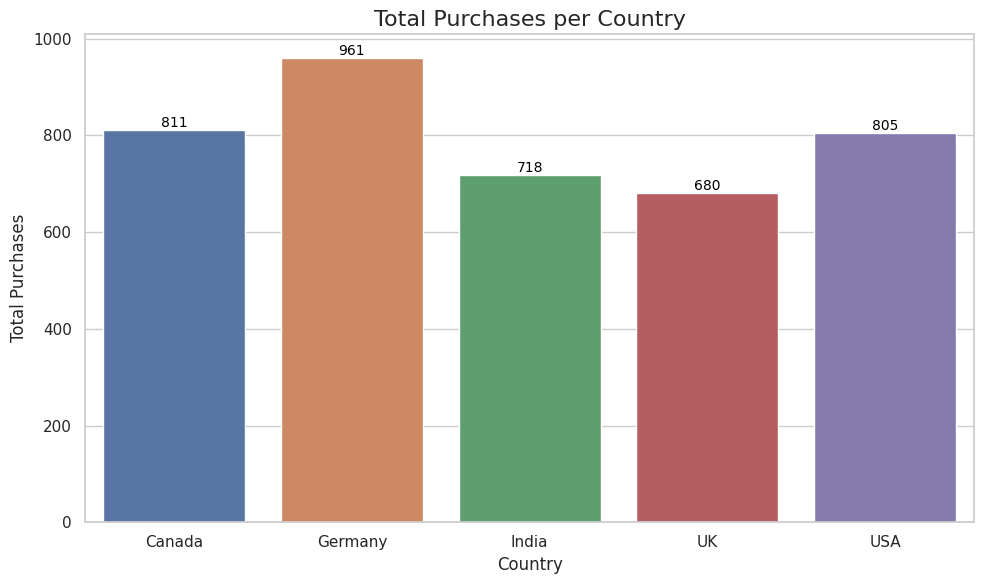

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

country_purchase_dist = df.groupby('country')['purchases'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=country_purchase_dist, x='country', y='purchases', palette='deep')

ax.set_title('Total Purchases per Country', fontsize=16)
ax.set_xlabel('Country')
ax.set_ylabel('Total Purchases')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


# Try boxplots as well

<ipython-input-25-3217770f09f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='country', y='purchases', palette='Set2')


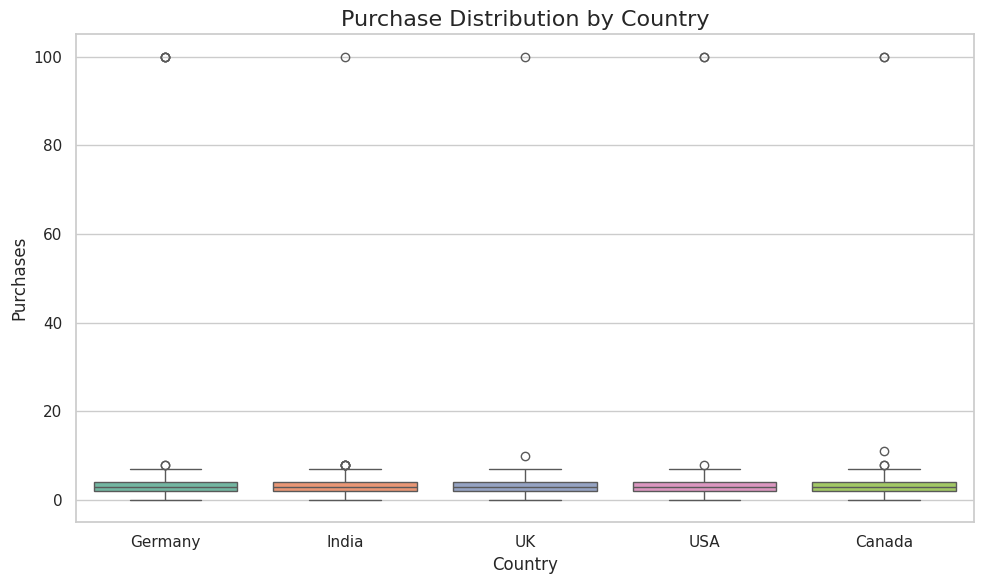

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='country', y='purchases', palette='Set2')

ax.set_title('Purchase Distribution by Country', fontsize=16)
ax.set_xlabel('Country')
ax.set_ylabel('Purchases')

plt.tight_layout()
plt.show()


<ipython-input-26-862faf0cbf9c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=country_purchase_dist, x='country', y='purchases', palette='deep')


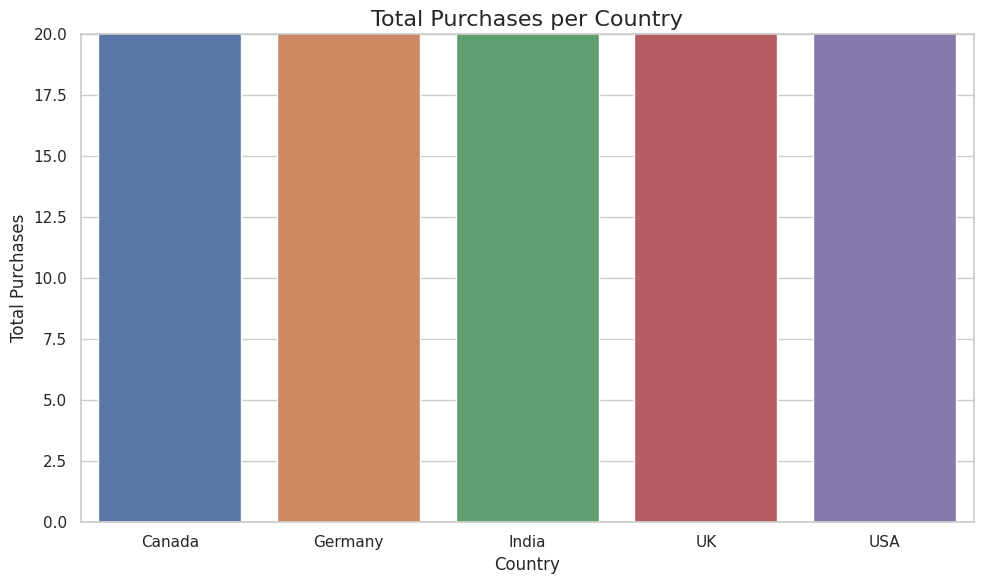

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

# Group and sum purchases by country
country_purchase_dist = df.groupby('country')['purchases'].sum().reset_index()

# Create figure
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=country_purchase_dist, x='country', y='purchases', palette='deep')

# Titles and labels
ax.set_title('Total Purchases per Country', fontsize=16)
ax.set_xlabel('Country')
ax.set_ylabel('Total Purchases')

# Set y-axis limit
ax.set_ylim(0, 20)

# Annotate each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


### Task 14: Export cleaned dataset to CSV

In [ ]:
df.to_csv('cleaned_data.csv', index=False)
